# Lab: kNN Classification of MNIST handwritten digits

We will perform one of the most tasks in machine learning research: Classifying hand-written digits in the MNIST dataset. We will compare various classification methods we have encountered so far.

I have saved the digits dataset in a format called 'pickle', which is one commonly used method for saving data or any object in Python that does not easily fit into a CSV file.

In this case, the data are images (of the hand-written digits) represented as 28 x 28 pixel arrays. Each element of an array is the intensity of a black and white image at that pixel.

Run the following code to load the dataset and explore it.

In [1]:
import pickle
import numpy as np

X = pickle.load(open('mnist_10k_X.pkl', 'rb'))
Y = pickle.load(open('mnist_10k_Y.pkl', 'rb'))

print("Shape of X:", X.shape)  # These are 28 x 28 pixel images. How many examples are there?

print("First digit in the dataset:", X[0, : :])  # look at what the first example looks like (note this is a Numpy array, NOT a Pandas DataFrame)

print("Unique digits present:", np.unique(Y))  # view the unique digits present in this dataset

Shape of X: (10000, 28, 28)
First digit in the dataset: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  60 254 255 224  59  59   9   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 150 253 253 253 253 253 137 118 118  27  28 118 118   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 119 253 253 253 253 253 253 253 253 193 195 253 253 154   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5  18  18  49 213 213 213 213 213 213 254 253 253 250 235
  114  37   0   0   0   0   0   0   0   0]
 [  0   

In [2]:
import pandas as pd
pd.value_counts(Y)

/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_71613/2398585476.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Y)


1    1183
7    1072
6    1022
4    1007
3    1001
2     980
0     967
9     953
8     945
5     870
Name: count, dtype: int64

### Visualize the digits

Since these are black and white images, where the entries in the array are grayscale intensity values, we can easily visualize the digit with plt.imshow(). Below I show you how to call it, but just know it visualizes the pixel intensities as an image.

2


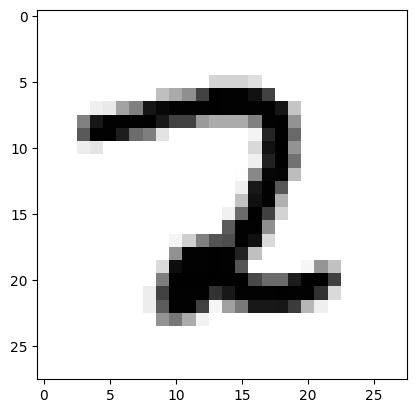

In [11]:
import matplotlib.pyplot as plt

plt.imshow(X[1300, :, :], cmap='gray_r')  # cmap='gray_r' says to plot in grayscale and make the digit black
print(Y[1300])

### Vectorize the data and train a k-nn classifier

In order to train a supervised learning model, we need to put the 28 x 28 grid into a vector. The following code does that and then fits a k-NN classifier.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

X_flattened = []
for i_ in range(len(X)):
    Xi_ = X[i_, :, :]
    Xi_flattened = Xi_.ravel()
    X_flattened.append(Xi_flattened)
    
X_flattened = np.array(X_flattened)  # turn it back into a Numpy Array

print("Shape of flattened data is:", X_flattened.shape)

k_ = 3  # first try 3 neighbors

clf = KNeighborsClassifier(n_neighbors=k_)
clf.fit(X_flattened, Y)

Shape of flattened data is: (10000, 784)


KNeighborsClassifier(n_neighbors=3)

In [24]:
X[1200].shape

(28, 28)

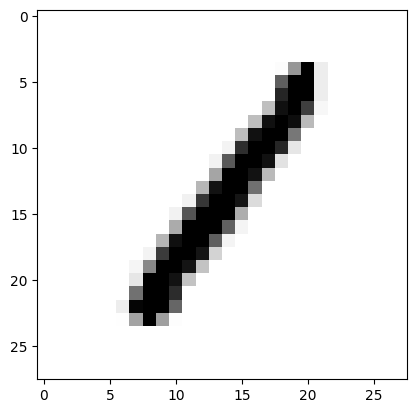

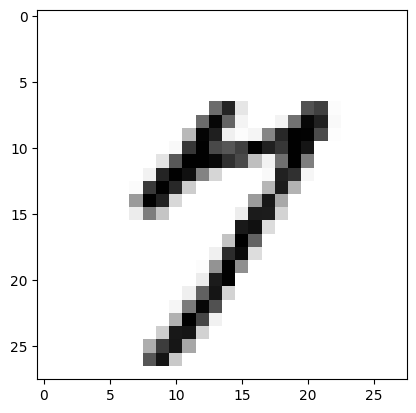

In [ ]:
# just checking out row 1200 and 6000
X_examples = X[[1200, 6000], :, :]

plt.figure()
plt.imshow(X_examples[0, :, :], cmap='gray_r')

plt.figure()
plt.imshow(X_examples[1, :, :], cmap='gray_r')

In [6]:
X_examples_flattened = []
for i_ in range(len(X_examples)):
    X_examples_flattened.append(X_examples[i_, :, :].ravel())
                                
Y_pred = clf.predict(X_examples_flattened)  # scikit-learn expects everything to be 2D, so I pass this in as a list

print("The predictions are:", Y_pred)

Y_pred_probs = clf.predict_proba(X_examples_flattened)
print("The predicted probabilities are:", Y_pred_probs)
print("Which correspond to the labels:", clf.classes_)

The predictions are: [1 7]
The predicted probabilities are: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Which correspond to the labels: [0 1 2 3 4 5 6 7 8 9]


### Cross-validating over k

This is a scikit-learn function, so you may remember from the lab in Lecture 2 how to easily perform cross validation over k using sklearn.model_selection.GridSearchCV.

The following code reminds you how to do this. Remember k-NN is an expensive algorithm so do not try too far beyond k=5 or you may end up waiting all day.

In [7]:
from sklearn.model_selection import GridSearchCV  # you may want to use this to select k in k-NN

clf = KNeighborsClassifier(n_neighbors=k_)
clf_cv = GridSearchCV(estimator=clf, param_grid={'n_neighbors': [1, 2, 3, 4, 5]})  # uses 5-fold cross validation by default

clf_cv.fit(X_flattened, Y)

print("The optimally selected parameter is:", clf_cv.best_params_)

The optimally selected parameter is: {'n_neighbors': 1}


### Note: 
In the above code, note that we did not specify a performance/evaluation metric with which to compare the different models during cross-validation. In this case, KNeighborsClassifier is using the mean accuracy as a score by default, and GridSearchCV is using 5-fold cross validation by default.


### Multiclass classification

Notice that we are doing multi-class classification, which is new for us, but is a simple generalization from the binary case. Most scikit-learn functions easily accept multi-class problems, where every unique value found in Y is treated as a different class.

The logistic regression method in scikit-learn will also readily accept Y containing multiple labels. As a performance metric you can just use the accuracy score (fraction that was classified correctly).

## Problem 1

Pull everything you have done over the labs together to experimentally compare the (multiclass) classification performance of k-NN classification, and logistic regression with L1 and L2 regularization.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV  # logistic regression with built in regularization. The penalty parameter is Cross-validated
from sklearn.metrics import accuracy_score
import time


n_splits = 20  # number of cross validation splits

indices = list(range(X_flattened.shape[0]))
n_train = int(len(indices) * .85)  # 85% train, 15% split

scores = {}  # this time we will use a dictionary structure to contain the errors
for model_name in ['knn1', 'knn3', 'knn5', 'logisticl1', 'logisticl2']:
    scores[model_name] = []  # initialize this dictionary entry to an empty list

# I'm lazy so I'll just do random sampling of test sets (instead of K-fold cross validation)
for i_ in range(n_splits):
    
    t_start = time.time()  # used to time things
        
    np.random.shuffle(indices)  # shuffles the list in-place, so returns nothing
    train_inds = indices[:n_train]  # the first 85% are training indices
    test_inds = indices[n_train:]  # the remaining 15% are testing indices
    
    X_train = X_flattened[train_inds, :]
    X_test = X_flattened[test_inds, :]

    Y_train = Y[train_inds]
    Y_test = Y[test_inds]
    
    # scale the predictors by the max pixel value
    for j_ in range(X_train.shape[1]):
        X_train[:, j_] = X_train[:, j_] / 256
        X_test[:, j_] = X_test[:, j_] / 256  # use the training statistics to transform the test cases
    
    # LASSO
    clf = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=1000)
    clf.fit(X_train, Y_train)
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['logisticl1'].append(score)
    print("Finished logreg l1 split:", i_)
    
    # RIDGE
    clf = LogisticRegressionCV(penalty='l2', max_iter=1000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  
    #Y_pred_probs = clf.predict_proba(X_test) 
    #score = roc_auc_score(Y_test, Y_pred_probs, multi_class='ovr')
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['logisticl2'].append(score)
    print("Finished logreg l2 split:", i_)
    
    #KNN with 1 neighbor
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, Y_train)  
    #Y_pred_probs = clf.predict_proba(X_test) 
    #auc = roc_auc_score(Y_test, Y_pred_probs, multi_class='ovr')
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['knn1'].append(score)
    print("Finished knn k=1 split:", i_)
    
    #KNN with 3 neighbors
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, Y_train)  
    #Y_pred_probs = clf.predict_proba(X_test) 
    #auc = roc_auc_score(Y_test, Y_pred_probs, multi_class='ovr')
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['knn3'].append(score)
    print("Finished knn k=3 split:", i_)

    #KNN with 5 neighbors    
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, Y_train)  
    #Y_pred_probs = clf.predict_proba(X_test) 
    #auc = roc_auc_score(Y_test, Y_pred_probs, multi_class='ovr')
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['knn5'].append(score)
    print("Finished knn k=5 split:", i_)
    
    t_elapsed = time.time() - t_start
    print("This split took: %.2f secs" % t_elapsed)


Finished logreg l1 split: 0
Finished logreg l2 split: 0
Finished knn k=1 split: 0
Finished knn k=3 split: 0
Finished knn k=5 split: 0
This split took: 13.31 secs
Finished logreg l1 split: 1
Finished logreg l2 split: 1
Finished knn k=1 split: 1
Finished knn k=3 split: 1
Finished knn k=5 split: 1
This split took: 17.47 secs
Finished logreg l1 split: 2
Finished logreg l2 split: 2
Finished knn k=1 split: 2
Finished knn k=3 split: 2
Finished knn k=5 split: 2
This split took: 12.48 secs
Finished logreg l1 split: 3
Finished logreg l2 split: 3
Finished knn k=1 split: 3
Finished knn k=3 split: 3
Finished knn k=5 split: 3
This split took: 12.31 secs
Finished logreg l1 split: 4
Finished logreg l2 split: 4
Finished knn k=1 split: 4
Finished knn k=3 split: 4
Finished knn k=5 split: 4
This split took: 12.39 secs
Finished logreg l1 split: 5
Finished logreg l2 split: 5
Finished knn k=1 split: 5
Finished knn k=3 split: 5
Finished knn k=5 split: 5
This split took: 12.37 secs
Finished logreg l1 split: 6


/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_71613/2077261507.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores['logisticl1'], scores['logisticl2'], scores['knn1'], scores['knn3'], scores['knn5']],


Text(0, 0.5, 'Classification accuracy')

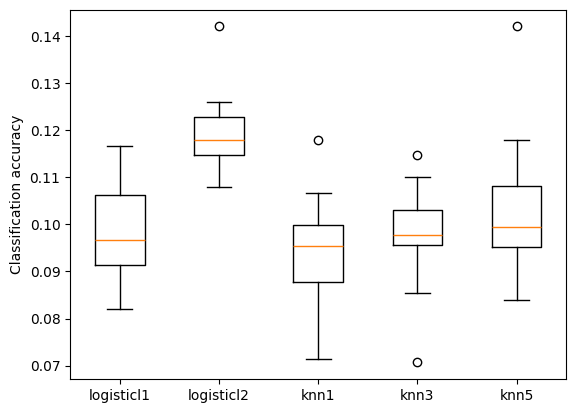

In [9]:
# plot the results
plt.figure()
plt.boxplot([scores['logisticl1'], scores['logisticl2'], scores['knn1'], scores['knn3'], scores['knn5']], 
            labels=['logisticl1', 'logisticl2', 'knn1', 'knn3', 'knn5'])
plt.ylabel('Classification accuracy')

## Challenge

Scikit-learn does not appear to have a built-in kernel smoothing module for supervised learning (do not get confused by other kernel methods such as those using Mercer kernels!)

Given all you know from the lecture, could you code up your own kernel smoothing model from scratch? If you want to challenge yourself, do it when you get home.

In [ ]:
# How can we adapt smoothing kernel methods for classification?

# Is this a multi class problem where we add a smoothing kernel method?

In [27]:
import numpy as np
from scipy.spatial.distance import cdist

class KernelClassifier:
    """
    A kernel smoothing classifier for supervised classification problems.
    
    This implementation uses a general kernel function with bandwidth parameter
    to create a non-parametric classifier.
    """
    
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        """
        Initialize the kernel classifier.
        
        Parameters:
        bandwidth: float, smoothing parameter
        kernel: string, kernel type ('gaussian', 'epanechnikov', 'uniform')
        """
        self.bandwidth = bandwidth
        self.kernel_type = kernel
        self.X_train = None
        self.y_train = None
        self.classes = None
    
    def kernel_function(self, distances):
        """
        Compute kernel weights based on distances.
        
        Parameters:
        distances: array of distances between points
        
        Returns:
        array of kernel weights
        """
        normalized_dist = distances / self.bandwidth
        
        if self.kernel_type == 'gaussian':
            # Gaussian kernel: exp(-0.5 * (d/h)^2)
            return np.exp(-0.5 * normalized_dist ** 2)
        
        elif self.kernel_type == 'epanechnikov':
            # Epanechnikov kernel: 0.75 * (1 - (d/h)^2) for |d/h| < 1, 0 otherwise
            weights = 0.75 * (1 - normalized_dist ** 2)
            return np.maximum(weights, 0)
        
        elif self.kernel_type == 'uniform':
            # Uniform kernel: 0.5 for |d/h| < 1, 0 otherwise
            return 0.5 * (np.abs(normalized_dist) < 1)
        
        else:
            raise ValueError(f"Unknown kernel type: {self.kernel_type}")
    
    def fit(self, X, y):
        """
        Fit the classifier to training data.
        For kernel smoothing, this simply stores the training data.
        
        Parameters:
        X: array-like of shape (n_samples, n_features), training data features
        y: array-like of shape (n_samples,), training data labels
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes = np.unique(y)
        return self
    
    def predict_proba(self, X):
        """
        Predict class probabilities for each sample.
        
        Parameters:
        X: array-like of shape (n_samples, n_features), test data features
        
        Returns:
        array-like of shape (n_samples, n_classes), class probabilities
        """
        X = np.array(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        
        # Calculate distances between test and training points
        distances = cdist(X, self.X_train)
        
        # Calculate kernel weights
        weights = self.kernel_function(distances)
        
        # Initialize probability matrix
        probas = np.zeros((n_samples, n_classes))
        
        # Calculate weighted votes for each class
        for i, cls in enumerate(self.classes):
            # For each sample and class, sum weights of training points of that class
            class_mask = (self.y_train == cls)
            class_weights = weights[:, class_mask]
            probas[:, i] = np.sum(class_weights, axis=1)
        
        # Normalize to get probabilities
        row_sums = probas.sum(axis=1)
        # Avoid division by zero
        row_sums = np.maximum(row_sums, 1e-10).reshape(-1, 1)
        probas = probas / row_sums
        
        return probas
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Parameters:
        X: array-like of shape (n_samples, n_features), test data features
        
        Returns:
        array-like of shape (n_samples,), predicted class labels
        """
        probas = self.predict_proba(X)
        return self.classes[np.argmax(probas, axis=1)]


def cross_validation(X, y, k_folds=5, bandwidths=None, kernels=None):
    """
    Perform k-fold cross-validation to find optimal bandwidth and kernel.
    
    Parameters:
    X: array-like of shape (n_samples, n_features), features
    y: array-like of shape (n_samples,), labels
    k_folds: int, number of folds
    bandwidths: list of float, bandwidths to try
    kernels: list of string, kernel types to try
    
    Returns:
    dict with best parameters and accuracy scores
    """
    if bandwidths is None:
        bandwidths = [0.1, 0.5, 1.0, 2.0, 5.0]
    
    if kernels is None:
        kernels = ['gaussian', 'epanechnikov', 'uniform']
    
    X = np.array(X)
    y = np.array(y)
    n_samples = X.shape[0]
    
    # Create fold indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    fold_size = n_samples // k_folds
    
    results = {
        'bandwidths': bandwidths,
        'kernels': kernels,
        'scores': np.zeros((len(bandwidths), len(kernels), k_folds)),
        'best_params': None,
        'best_score': 0
    }
    
    # Perform cross-validation
    for fold in range(k_folds):
        # Split data into train and test
        test_indices = indices[fold * fold_size:(fold + 1) * fold_size]
        train_indices = np.setdiff1d(indices, test_indices)
        
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        # Try different bandwidths and kernels
        for i, bandwidth in enumerate(bandwidths):
            for j, kernel in enumerate(kernels):
                # Train classifier
                clf = KernelClassifier(bandwidth=bandwidth, kernel=kernel)
                clf.fit(X_train, y_train)
                
                # Make predictions
                y_pred = clf.predict(X_test)
                
                # Calculate accuracy
                accuracy = np.mean(y_pred == y_test)
                results['scores'][i, j, fold] = accuracy
    
    # Calculate mean scores across folds
    mean_scores = np.mean(results['scores'], axis=2)
    
    # Find best parameters
    best_idx = np.unravel_index(np.argmax(mean_scores), mean_scores.shape)
    results['best_params'] = {
        'bandwidth': bandwidths[best_idx[0]],
        'kernel': kernels[best_idx[1]]
    }
    results['best_score'] = mean_scores[best_idx]
    
    return results


def main():
    """
    Main function to demonstrate kernel smoothing classification.
    """
    # Example usage (replace with your actual data loading)
    # X, y = load_data()
    
    # Split data into train and test
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Cross-validation to find best parameters
    bandwidths = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
    kernels = ['gaussian', 'epanechnikov', 'uniform']
    cv_results = cross_validation(X, y, k_folds=5, bandwidths=bandwidths, kernels=kernels)
    
    # Print cross-validation results
    print("Cross-validation results:")
    print(f"Best bandwidth: {cv_results['best_params']['bandwidth']}")
    print(f"Best kernel: {cv_results['best_params']['kernel']}")
    print(f"Best accuracy: {cv_results['best_score']:.4f}")
    
    # Train final model with best parameters
    best_bandwidth = cv_results['best_params']['bandwidth']
    best_kernel = cv_results['best_params']['kernel']
    
    clf = KernelClassifier(bandwidth=best_bandwidth, kernel=best_kernel)
    clf.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred = clf.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"Test accuracy: {accuracy:.4f}")
    
    # If using scikit-learn metrics, you could also print:
    # from sklearn.metrics import classification_report
    # print(classification_report(y_test, y_pred))


if __name__ == "__main__":
    main()

NameError: name 'y' is not defined